In [2]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

from sklearn.ensemble import VotingRegressor


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#!pip install scikit-optimize
#from skopt import BayesSearchCV

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#We must change categorical variables on numeric variables. 
df_=pd.get_dummies(df, drop_first= True)
df_

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


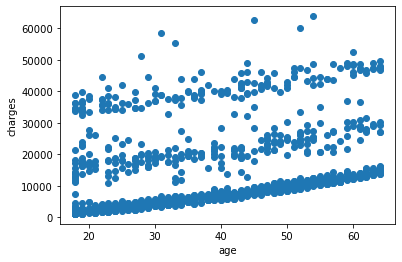

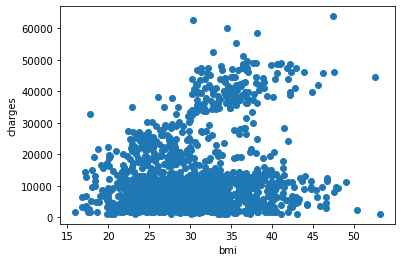

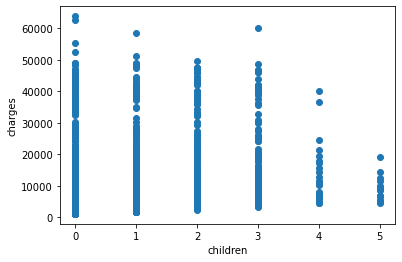

In [5]:
#We want to see how the explanatory variables depend on the 'charges'
cols = ['age','bmi','children']
for col in cols:
    plt.scatter(df_[col], df_['charges'])
    plt.xlabel(col)
    plt.ylabel('charges')
    plt.show()

In [6]:
#When we have numeric data, we must Standard data. 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_)
scaled_data = scaler.transform(df_)
columns_names = {0:'age',1:'bmi', 2:'children',3:'charges', 4:'sex_male', 5:'smoker_yes',6:'region_northwest',7:'region_southeast', 8:'region_southwest'}
df_ = pd.DataFrame(data=scaled_data)
df_ = df_.rename(columns_names, axis='columns')

df_

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,0.989591,-0.507463,1.765481,-0.611324,-0.566418
1334,-1.509965,0.206139,-0.908614,-0.914002,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
1335,-1.509965,1.014878,-0.908614,-0.961596,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
1336,-1.296362,-0.797813,-0.908614,-0.930362,-1.010519,-0.507463,-0.566418,-0.611324,1.765481


In [7]:
X=df_.copy().drop('charges', axis=1)
y=df_['charges'].copy()


In [8]:
#We split ours data to train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [9]:
#We check an example RandomForest model
rf_regressor = RandomForestRegressor(n_estimators = 5, max_depth=4, bootstrap=True, random_state=1)

from sklearn.model_selection import cross_val_score

rf_regressor.fit(X_train, y_train)
cv_results = cross_val_score(rf_regressor, X_train, y_train, cv=5)
cv_results


array([0.83040446, 0.91062278, 0.83008167, 0.80192586, 0.84094533])

In [10]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,0.412467,-0.900341,0.751079,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
887,-0.228344,-0.105546,-0.908614,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
890,1.765289,-0.619825,-0.908614,-1.010519,1.970587,1.765481,-0.611324,-0.566418
1293,0.483668,-0.806836,1.580926,0.989591,-0.507463,1.765481,-0.611324,-0.566418
259,-1.438764,0.206139,-0.908614,0.989591,1.970587,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...
109,1.694088,0.726160,-0.908614,0.989591,1.970587,-0.566418,1.635795,-0.566418
575,1.338082,-0.573072,-0.908614,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
535,-0.085942,-0.432814,-0.078767,0.989591,-0.507463,-0.566418,-0.611324,-0.566418
543,1.053277,2.747188,-0.908614,-1.010519,1.970587,-0.566418,1.635795,-0.566418


In [11]:
y_pred = rf_regressor.predict(X_test)

In [12]:
rf_regressor.score(X_train, y_train)

0.8701262030320339

In [13]:
rf_regressor.score(X_test, y_test) # R^2

0.8703323752890307

In [14]:
#We check matrics 
from sklearn.metrics import r2_score
print('R2: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MAPE: {}'.format(mean_absolute_percentage_error(y_test, y_pred)))


R2: 0.8703323752890307
MSE: 0.13737105374502162
MAE: 0.21822817424386928
MAPE: 0.6633684136470483


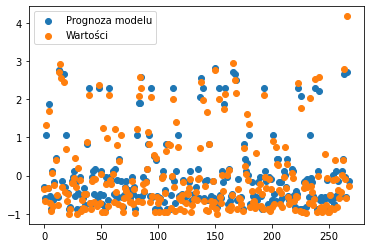

In [73]:
#We see that model have good value of matrics, we make a scatter plot of real and predict values
plt.scatter(range(len(y_pred)), y_pred, label = 'Prognoza modelu')
plt.scatter(range(len(y_pred)), y_test, label = 'Wartości')
plt.legend()

In [82]:
#We check an exemple RandomForest model, but we want to know what are the parameters of the model, that give the best results
#We use a hyperopt
import hyperopt
from hyperopt import hp, fmin, tpe
from hyperopt.pyll.base import scope

space_rf = {"max_depth": hp.randint('max_depth', 1, 100),
             "n_estimators": scope.int(hp.qloguniform('n_estimators', 1, 10, 1)),
             "min_samples_leaf": hp.randint('min_samples_leaf', 1, 50),
             "max_features": hp.choice('max_features', ['sqrt', 2, 3, 4, 5, 6, 7, 8]),
             }

def minimize_rf(params):
    max_depth = params["max_depth"]
    max_features = params['max_features']
    min_samples = params['min_samples_leaf']
    n_estimators = int(params['n_estimators'])
    model = RandomForestRegressor(max_depth=max_depth, max_features=max_features, min_samples_leaf=min_samples, n_estimators=n_estimators)
    mean_cv_score = np.mean(cross_val_score(model, X_train, y_train))
    return -mean_cv_score

print(hyperopt.pyll.stochastic.sample(space_rf))

{'max_depth': array(98, dtype=int64), 'max_features': 'sqrt', 'min_samples_leaf': array(4, dtype=int64), 'n_estimators': 296}


In [83]:
best_rf = fmin(minimize_rf, space_rf, max_evals=10, algo=tpe.suggest)
best_rf

100%|██████████| 10/10 [02:47<00:00, 16.74s/trial, best loss: -0.8473986393473799]


{'max_depth': 34,
 'max_features': 4,
 'min_samples_leaf': 12,
 'n_estimators': 7478.0}

In [15]:
best_rf_regressor = RandomForestRegressor(n_estimators = 7478, max_depth=34, min_samples_leaf=12, random_state=1)
best_rf_regressor.fit(X_train, y_train)
y_pred_best = best_rf_regressor.predict(X_test)
print('R2: {}'.format(r2_score(y_test, y_pred_best)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred_best)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred_best)))
print('MAPE: {}'.format(mean_absolute_percentage_error(y_test, y_pred_best)))


R2: 0.8769090924307861
MSE: 0.13040362015502804
MAE: 0.20707129300374782
MAPE: 0.6109391060876079


In [16]:
importances = best_rf_regressor.feature_importances_

In [25]:
importances

array([0.12342788, 0.1879271 , 0.01058248, 0.00254317, 0.67092025,
       0.00111107, 0.00188355, 0.00160449])

Text(0, 0.5, 'FEATURE NAMES')

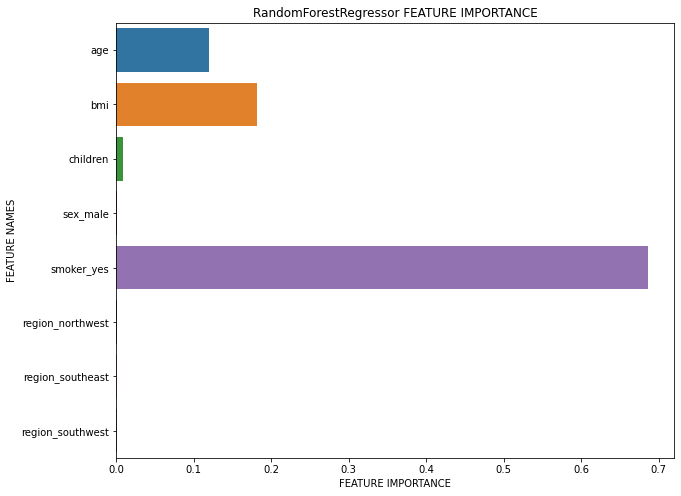

In [17]:
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=importances, y=X.columns)
#Add chart labels
plt.title('RandomForestRegressor ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

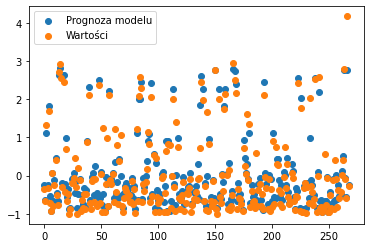

In [18]:
plt.scatter(range(len(y_pred_best)), y_pred_best, label = 'Prognoza modelu')
plt.scatter(range(len(y_pred_best)), y_test, label = 'Wartości')
plt.legend()

In [ ]:
#We have 2 irrelevant variables, so we can drop this variables and check a model 

In [23]:
X_new=df_.copy().drop(['charges','region_northwest','region_southwest'], axis=1)
y=df_['charges'].copy()


In [24]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new, y, test_size= 0.2, random_state= 42)

In [26]:
bestn_rf_regressor = RandomForestRegressor(n_estimators = 365, max_depth=47, min_samples_leaf=6, random_state=1)
bestn_rf_regressor.fit(Xn_train, yn_train)
yn_pred_best = bestn_rf_regressor.predict(Xn_test)
r2_score(yn_test, yn_pred_best)
print('R2: {}'.format(r2_score(yn_test, yn_pred_best)))
print('MSE: {}'.format(mean_squared_error(yn_test, yn_pred_best)))
print('MAE: {}'.format(mean_absolute_error(yn_test, yn_pred_best)))
print('MAPE: {}'.format(mean_absolute_percentage_error(yn_test, yn_pred_best)))

R2: 0.8773216489302182
MSE: 0.12996655407023872
MAE: 0.20215391813331213
MAPE: 0.7142011075833355


In [27]:
importances = bestn_rf_regressor.feature_importances_
importances

array([0.12375652, 0.18919749, 0.01070847, 0.00254215, 0.67208748,
       0.0017079 ])

Text(0, 0.5, 'FEATURE NAMES')

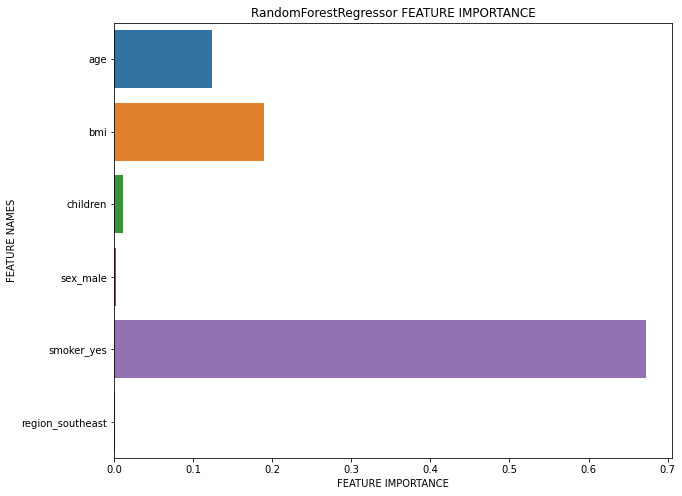

In [28]:
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=importances, y=X.columns)
#Add chart labels
plt.title('RandomForestRegressor ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')